In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.models import load_model
from tensorflow import math

In [5]:
full_df = pd.read_csv("../Data/dataset.csv")
to_drop = ['nameOrig','nameDest','isFlaggedFraud']
full_df.drop(columns= to_drop, inplace=True)

In [6]:
full_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


In [3]:
fraud_df = full_df.loc[full_df['Class'] == 1]
fraud_df = fraud_df.reset_index(drop=True)

In [7]:
fraud_df = full_df.loc[full_df['isFraud']==1]
fraud_df = fraud_df.reset_index(drop=True)

In [8]:
not_fraud_df = full_df.loc[full_df['isFraud']==0]
not_fraud_df = not_fraud_df.sample(n=8213, random_state=1)
not_fraud_df = not_fraud_df.reset_index(drop=True)

In [9]:
new_df = fraud_df.append(not_fraud_df, ignore_index=True)

In [10]:
data = new_df.drop("isFraud", axis=1)
feature_names = data.columns
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,TRANSFER,181.0,181.0,0.0,0.0,0.0
1,1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0
2,1,TRANSFER,2806.0,2806.0,0.0,0.0,0.0
3,1,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0
4,1,TRANSFER,20128.0,20128.0,0.0,0.0,0.0


In [11]:
data['type'] = data['type'].replace(['CASH_OUT'], 1)
data['type'] = data['type'].replace(['CASH_IN'], 2)
data['type'] = data['type'].replace(['TRANSFER'], 3)
data['type'] = data['type'].replace(['DEBIT'], 4)
data['type'] = data['type'].replace(['PAYMENT'], 5)


In [12]:
target = new_df["isFraud"]
target_names = ["negative", "positive"]
#might need to change to 0/1 - or replace is fraut with words instead of integers

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=8)

In [14]:
X_scaler = MinMaxScaler(feature_range=(0,1)).fit(X_train)

In [15]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [17]:
model = Sequential()
model.add(Dense(units=21, activation='relu', input_dim=7))
model.add(Dense(units=21, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [18]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [19]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 12319 samples
Epoch 1/100
12319/12319 - 1s - loss: 0.5533 - accuracy: 0.6855
Epoch 2/100
12319/12319 - 0s - loss: 0.3733 - accuracy: 0.8392
Epoch 3/100
12319/12319 - 0s - loss: 0.3269 - accuracy: 0.8652
Epoch 4/100
12319/12319 - 0s - loss: 0.2888 - accuracy: 0.8794
Epoch 5/100
12319/12319 - 0s - loss: 0.2640 - accuracy: 0.8870
Epoch 6/100
12319/12319 - 0s - loss: 0.2438 - accuracy: 0.8941
Epoch 7/100
12319/12319 - 0s - loss: 0.2313 - accuracy: 0.8998
Epoch 8/100
12319/12319 - 0s - loss: 0.2203 - accuracy: 0.9048
Epoch 9/100
12319/12319 - 0s - loss: 0.2122 - accuracy: 0.9085
Epoch 10/100
12319/12319 - 0s - loss: 0.2048 - accuracy: 0.9143
Epoch 11/100
12319/12319 - 0s - loss: 0.1966 - accuracy: 0.9183
Epoch 12/100
12319/12319 - 0s - loss: 0.1915 - accuracy: 0.9209
Epoch 13/100
12319/12319 - 1s - loss: 0.1831 - accuracy: 0.9237
Epoch 14/100
12319/12319 - 1s - loss: 0.1780 - accuracy: 0.9273
Epoch 15/100
12319/12319 - 0s - loss: 0.1726 - accuracy: 0.9282
Epoch 16/100
12319/12319 -

In [20]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)

print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4107/4107 - 0s - loss: 0.0791 - accuracy: 0.9822
Loss: 0.07910170856911335, Accuracy: 0.9822254776954651


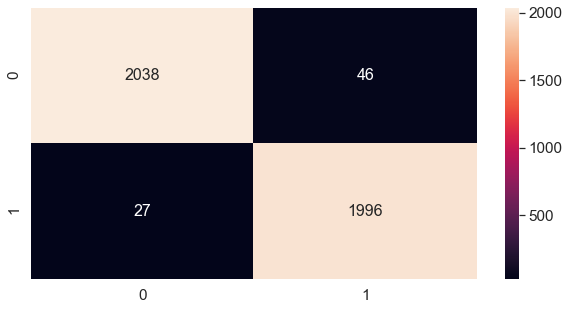

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test_categorical.argmax(axis=1),model.predict(X_test_scaled).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(2),
                    range(2))
plt.figure(figsize = (10,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size

<Figure size 432x288 with 0 Axes>